In [1]:
import seaborn as sns

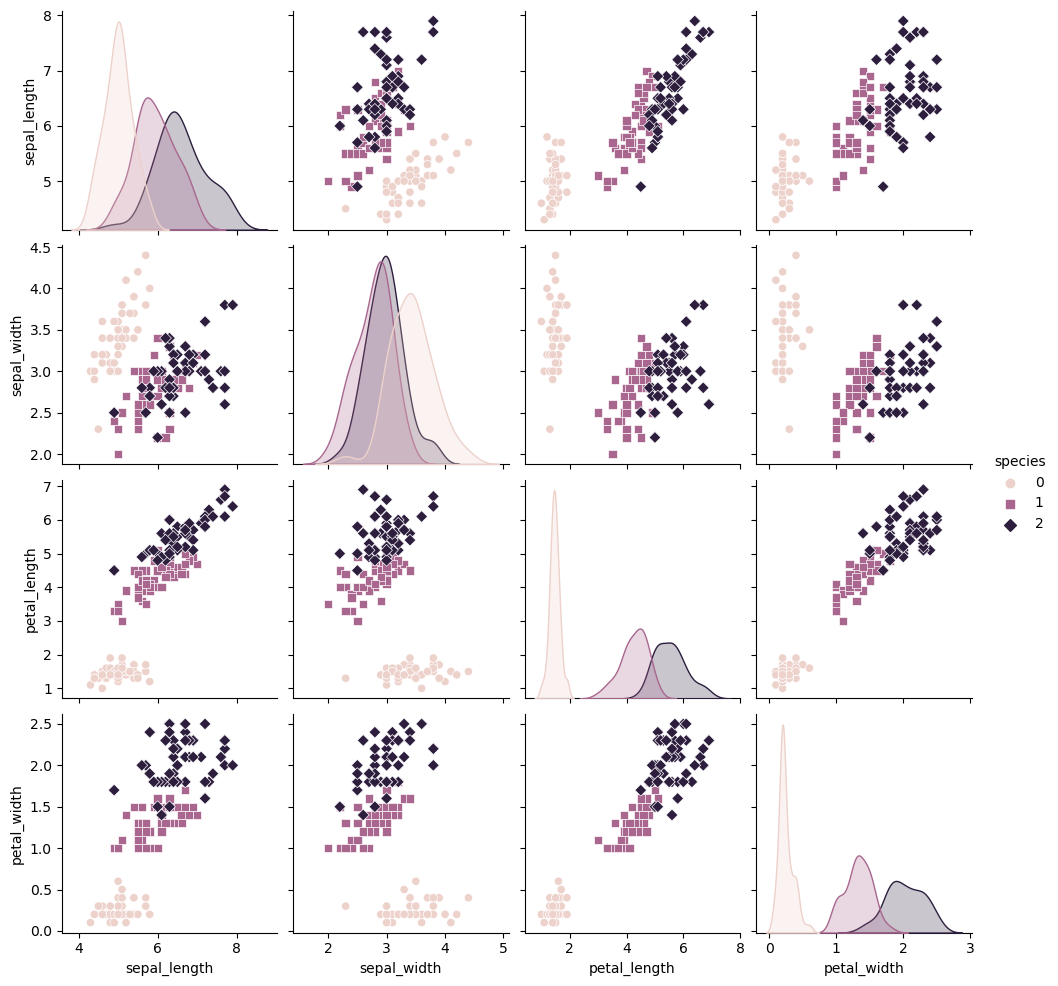

Test Accuracy: 1.0000
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


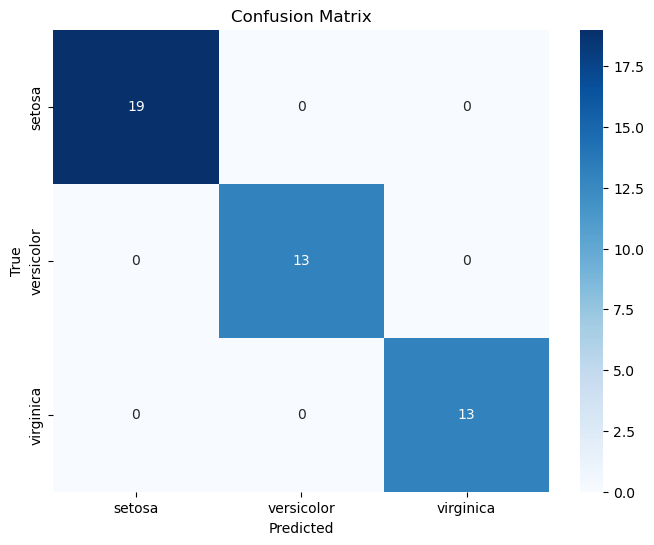

In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter

# Load the iris dataset using seaborn
iris = sns.load_dataset("iris")

# Map species names to numerical values
species_mapping = {species: idx for idx, species in enumerate(iris['species'].unique())}
iris['species'] = iris['species'].map(species_mapping)

# Convert to numpy arrays
X = iris.drop(columns=['species']).values
y = iris['species'].values

# Data Visualization
sns.pairplot(iris, hue='species', markers=["o", "s", "D"])
plt.show()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Simple KNN implementation
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def knn_predict(X_train, y_train, x_test, k=3):
    distances = [euclidean_distance(x_test, x_train) for x_train in X_train]
    k_indices = np.argsort(distances)[:k]
    k_nearest_labels = [y_train[i] for i in k_indices]
    most_common = Counter(k_nearest_labels).most_common(1)
    return most_common[0][0]

# Predicting the test set results
y_pred = [knn_predict(X_train, y_train, x_test) for x_test in X_test]

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Confusion Matrix
conf_matrix = np.zeros((3, 3), dtype=int)
for true_label, pred_label in zip(y_test, y_pred):
    conf_matrix[true_label, pred_label] += 1
print("Confusion Matrix:\n", conf_matrix)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
species_names = [name for name, idx in species_mapping.items()]
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=species_names, yticklabels=species_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
